In [3]:
!pip install Thermobar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt


  Using cached Thermobar-1.0.14-py3-none-any.whl (3.1 MB)
  Using cached python_ternary-1.0.8-py3-none-any.whl (18 kB)


In [4]:
#pip show -f Thermobar

In [5]:
orig_data = pd.read_excel ("Geotherms craton.xlsx",sheet_name='Sea')


In [6]:
K=orig_data['CPX_OPX_T']+273.15
Gpa=orig_data['CPX_OPX_P'] 

In [7]:
K1=orig_data['CPX_T']+273.15
Gpa1=orig_data['CPX_P'] 

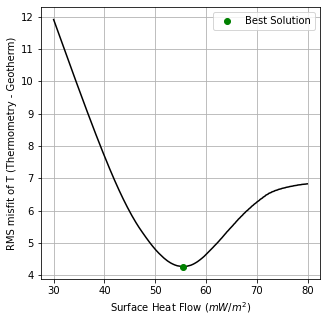

In [8]:
T_ext1 = K
P_ext1 = Gpa

#Solving for SHF values between 35 (SHF_start) and 45 (SHF_end) for the function with increments of 0.1 (SHF increment)
#to minimise the RMS misfit function find the best fitting geotherm.
#Adiabat=True adds adiabat to the end of the conductive geotherm.
#Kinked=True adds kinked geotherm at the temperature BDL_T, parallel to the D-G transition.
#max_depth=maximum depth until the geotherm is calculated.
#plot_solution=True returns a graph of minimisation process.
shf_solution, T_solution, depth_solution, p_solution, misfit_solution = pt.invert_generalised_mantle_geotherm(P_sample = P_ext1, T_sample = T_ext1, std_P = 0.3, std_T = 50,
 SHF_start = 30, SHF_end=80, SHF_increment=0.1, max_depth=300, kinked=False, BDL_T = 170, adiabat = True,
 plot_solution = True)

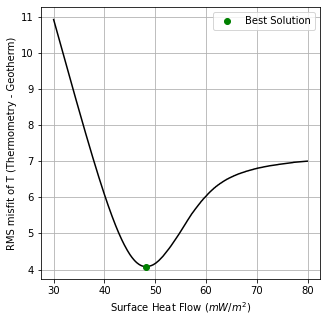

[ 273.          288.9838929   304.87428604  320.84826423  336.86609359
  352.89282219  368.89556702  384.84356934  400.70818632  416.46285773
  432.08305305  447.5462036   462.83162358  477.92042337  492.7954178
  507.44103152  521.84320322  535.98929024  551.47057007  566.81210327
  582.01076712  597.060851    611.95716211  626.69497813  641.2700096
  655.67836575  669.91652319  683.98129737  697.86981643  711.57949719
  725.1080232   738.45332453  751.61355918  764.58709595  777.37249866
  789.96851161  802.37404606  814.58816781  826.61008565  838.43914066
  846.75856395  855.08786878  863.42097046  871.75759281  880.09745774
  888.44029456  896.78583977  905.13383687  913.48403624  921.83619494
  930.19007654  938.54545101  946.90209452  955.03784292  963.17361259
  971.30891656  979.44357447  987.57741046  995.71025349 1003.84193717
 1011.97229972 1020.10118379 1028.22843639 1036.35390877 1044.47745634
 1052.59893852 1060.71821871 1068.83516412 1076.94964576 1085.06153827
 1093.17

In [42]:
T_ext = K1
P_ext = Gpa1

#Solving for SHF values between 35 (SHF_start) and 45 (SHF_end) for the function with increments of 0.1 (SHF increment)
#to minimise the RMS misfit function find the best fitting geotherm.
#Adiabat=True adds adiabat to the end of the conductive geotherm.
#Kinked=True adds kinked geotherm at the temperature BDL_T, parallel to the D-G transition.
#max_depth=maximum depth until the geotherm is calculated.
#plot_solution=True returns a graph of minimisation process.
shf_solution1, T_solution1, depth_solution1, p_solution1, misfit_solution1 = pt.invert_generalised_mantle_geotherm(P_sample = P_ext, T_sample = T_ext, std_P = 0.3, std_T = 50,
 SHF_start = 30, SHF_end=80, SHF_increment=0.1, max_depth=300, kinked=False, BDL_T = 170, adiabat = True,
 plot_solution = True)

In [45]:
def mantle_geotherm_plot1(T,T1, P, P1, Depth, Depth1, plot_style, Temp_unit, T_Sample, T_Sample1, P_Sample, P_Sample1, T_std, P_std, max_depth, plot_type, **kwargs):

    '''
    A function to plot calculate geotherm alongside the thermobarometric
    calculations.

    ###Parameters###
    T: Temperature array of the geotherm.

    P: Pressure array of the geotherm.

    Depth: Depth array of the geotherm in meters.

    plot_style: String parameter for the y-axis of the geotherm plot 'Pressure' or 'Depth'.

    Temp_unit: String parameter for the temperature unit, 'Celsius' or 'Kelvin'.

    T_Sample: Array of temperature of the thermobarometric solutions.

    P_Sample: Array of pressure of the thermobarometric solutions in GPa.

    T_std: Standart deviation of thermobarometric temperature estimation. Could be array or a single value.

    P_std: Standart deviation of thermobarometric pressure estimation. Could be array or a single value.

    max_depth: Maximum depth to show the plot.

    leg: Boolean parameter to set existence of a legend.

    plot_type: 'show' or 'save' the figure.

    moho: moho depth in km.

    lab: lab depth in km.

    Depth_Sample: Array of depths of the thermobarometric solutions.

    filename_save: string parameter for filename to save the figures.
    '''

    moho = kwargs.pop('moho', None)
    lab = kwargs.pop('lab', None)
    Depth_Sample = kwargs.pop('Depth_Sample', None)
    filename_save = kwargs.pop('filename_save', 'Geotherm_Plot.png')
    leg = kwargs.pop('leg', True)

    Depth = Depth/1e3
    Depth1 = Depth1/1e3


    fig = plt.figure(figsize = (4,10),dpi=300)
    ax1 = plt.subplot(111)
    if Temp_unit == 'Celsius':
        T = np.array(T) - 273.15
        T1 = np.array(T) - 273.15
        
        ax1.set_xlabel('Temperature [$^{\circ} C$]')
    else:
        ax1.set_xlabel('Temperature [$^{\circ} K$]')

    if P_std is not list:
        P_std = np.ones(len(P_Sample)) * P_std
        P_std1 = np.ones(len(P_Sample1)) * P_std
    if T_std is not list:
        T_std = np.ones(len(T_Sample)) * T_std

    if plot_style == 'Pressure':
        ax1.plot(T,P,'k',lw = 1.5,alpha = 0.8)
        ax1.set_ylabel('Pressure [GPa]')
        if (T_Sample is not None) and (P_Sample is not None):

            if (Temp_unit == 'Celsius'):
                T_Sample = np.array(T_Sample) - 273.15

            ax1.errorbar(T_Sample, P_Sample, yerr = [P_std,P_std],xerr = [T_std,T_std],
            fmt = 'o',color = '#bd3b24',markersize = 5,label = 'Xenolith Data',
            ecolor = 'k',elinewidth = 0.5,alpha = 0.4, markeredgecolor = 'k')

        ax1.set_ylim(np.amax(P),0)

        ax1.set_xlim(0, np.amax(np.concatenate((T,T_Sample))) + 100.0)

    elif plot_style == 'Depth':
        ax1.plot(T,Depth,'k',lw = 1.5,alpha = 0.8)
        ax1.plot(T1,Depth1,'b',lw = 1.5,alpha = 0.8)
        ax1.set_ylabel('Depth [km]')

        if (T_Sample is not None):
            if (Temp_unit == 'Celsius'):
                T_Sample = np.array(T_Sample) - 273.15
                T_Sample1 = np.array(T_Sample1) - 273.15
            positive_pressure_diff_list = []
            negative_pressure_diff_list = []
            positive_pressure_diff_list1 = []
            negative_pressure_diff_list1 = []
            if Depth_Sample is None:
                Depth_Sample = np.zeros(len(P_Sample))
                Depth_Sample1 = np.zeros(len(P_Sample1))
                run_dep = True
            for i in range(0,len(P_std)):

                if run_dep == True:
                    Depth_Sample[i] = Depth[(np.abs(P-P_Sample[i])).argmin()]
                positive_pressure = P_Sample[i] + P_std[i]
                positive_pressure_depth = Depth[(np.abs(P-positive_pressure)).argmin()]
                positive_pressure_diff_list.append((positive_pressure_depth - Depth_Sample[i]))
                negative_pressure = P_Sample[i] - P_std[i]
                negative_pressure_depth = Depth[(np.abs(P-negative_pressure)).argmin()]
                negative_pressure_diff_list.append((Depth_Sample[i] - positive_pressure_depth))

            for i in range(0,len(P_std1)):

                if run_dep == True:
                    Depth_Sample1[i] = Depth1[(np.abs(P1-P_Sample[i])).argmin()]
                positive_pressure1 = P_Sample1[i] + P_std1[i]
                positive_pressure_depth1 = Depth1[(np.abs(P1-positive_pressure)).argmin()]
                positive_pressure_diff_list1.append((positive_pressure_depth1 - Depth_Sample1[i]))
                negative_pressure1 = P_Sample1[i] - P_std1[i]
                negative_pressure_depth1 = Depth1[(np.abs(P1-negative_pressure1)).argmin()]
                negative_pressure_diff_list1.append((Depth_Sample1[i] - positive_pressure_depth1))

            ax1.errorbar(T_Sample, Depth_Sample, yerr = [negative_pressure_diff_list,positive_pressure_diff_list],xerr = [T_std,T_std],
            fmt = 'o',color = '#bd3b24',markersize = 5,label = 'Xenolith Data',
            ecolor = 'k',elinewidth = 0.5,alpha = 0.2, markeredgecolor = 'k')
            print(Depth_Sample1)
            ax1.errorbar(T_Sample1, Depth_Sample1, yerr = [negative_pressure_diff_list1,positive_pressure_diff_list1],xerr = [T_std,T_std],
            fmt = 'o',color = '#24a6bd',markersize = 5,label = 'Test Data',
            ecolor = 'k',elinewidth = 0.5,alpha = 0.2, markeredgecolor = 'k')
        ax1.set_ylim(np.amax(Depth),0)

        ax1.set_xlim(0, np.amax(np.concatenate((T,T_Sample))) + 100.0)

    if (moho != None) or (lab != None):

        import matplotlib.patches as patches

    if moho != None:

        if plot_style == 'Depth':
            ax1.axhline(moho, linestyle = '--', color = 'k', label = 'MOHO')
            crust_obj = patches.Rectangle((0,0) ,100000.0, moho, color = '#6cc1c7', alpha = 0.6)
            ax1.add_patch(crust_obj)

        elif plot_style == 'Pressure':
            pressure_equivalent_moho = P[(np.abs((Depth / 1e3)-moho)).argmin()]
            ax1.axhline(pressure_equivalent_moho, linestyle = '--', color = 'k', label = 'MOHO')
            crust_obj = patches.Rectangle((0,0) ,100000.0, pressure_equivalent_moho, color = '#6cc1c7', alpha = 0.6)
            ax1.add_patch(crust_obj)

    if lab != None:

        if plot_style == 'Depth':
            ax1.axhline(lab, linestyle = '--', color = '#9d1414', label = 'LAB')
            mantle_obj = patches.Rectangle((0,lab) ,100000.0, 1e5, color = '#c76c75', alpha = 0.6)
            ax1.add_patch(mantle_obj)

        elif plot_style == 'Pressure':
            pressure_equivalent_lab = P[(np.abs((Depth / 1e3)-lab)).argmin()]
            ax1.axhline(pressure_equivalent_lab, linestyle = '--', color = '#9d1414', label = 'LAB')
            mantle_obj = patches.Rectangle((0,pressure_equivalent_lab) ,100000.0, 1e5, color = '#c76c75', alpha = 0.6)
            ax1.add_patch(mantle_obj)
        
    ax1.grid()

    if leg == True:
        ax1.legend(loc="upper right")

    if plot_type == 'show':
        plt.show()
    elif plot_type == 'save':
        plt.savefig(filename_save, dpi = 300)


[ 66.  50.  93. ... 101. 104. 164.]


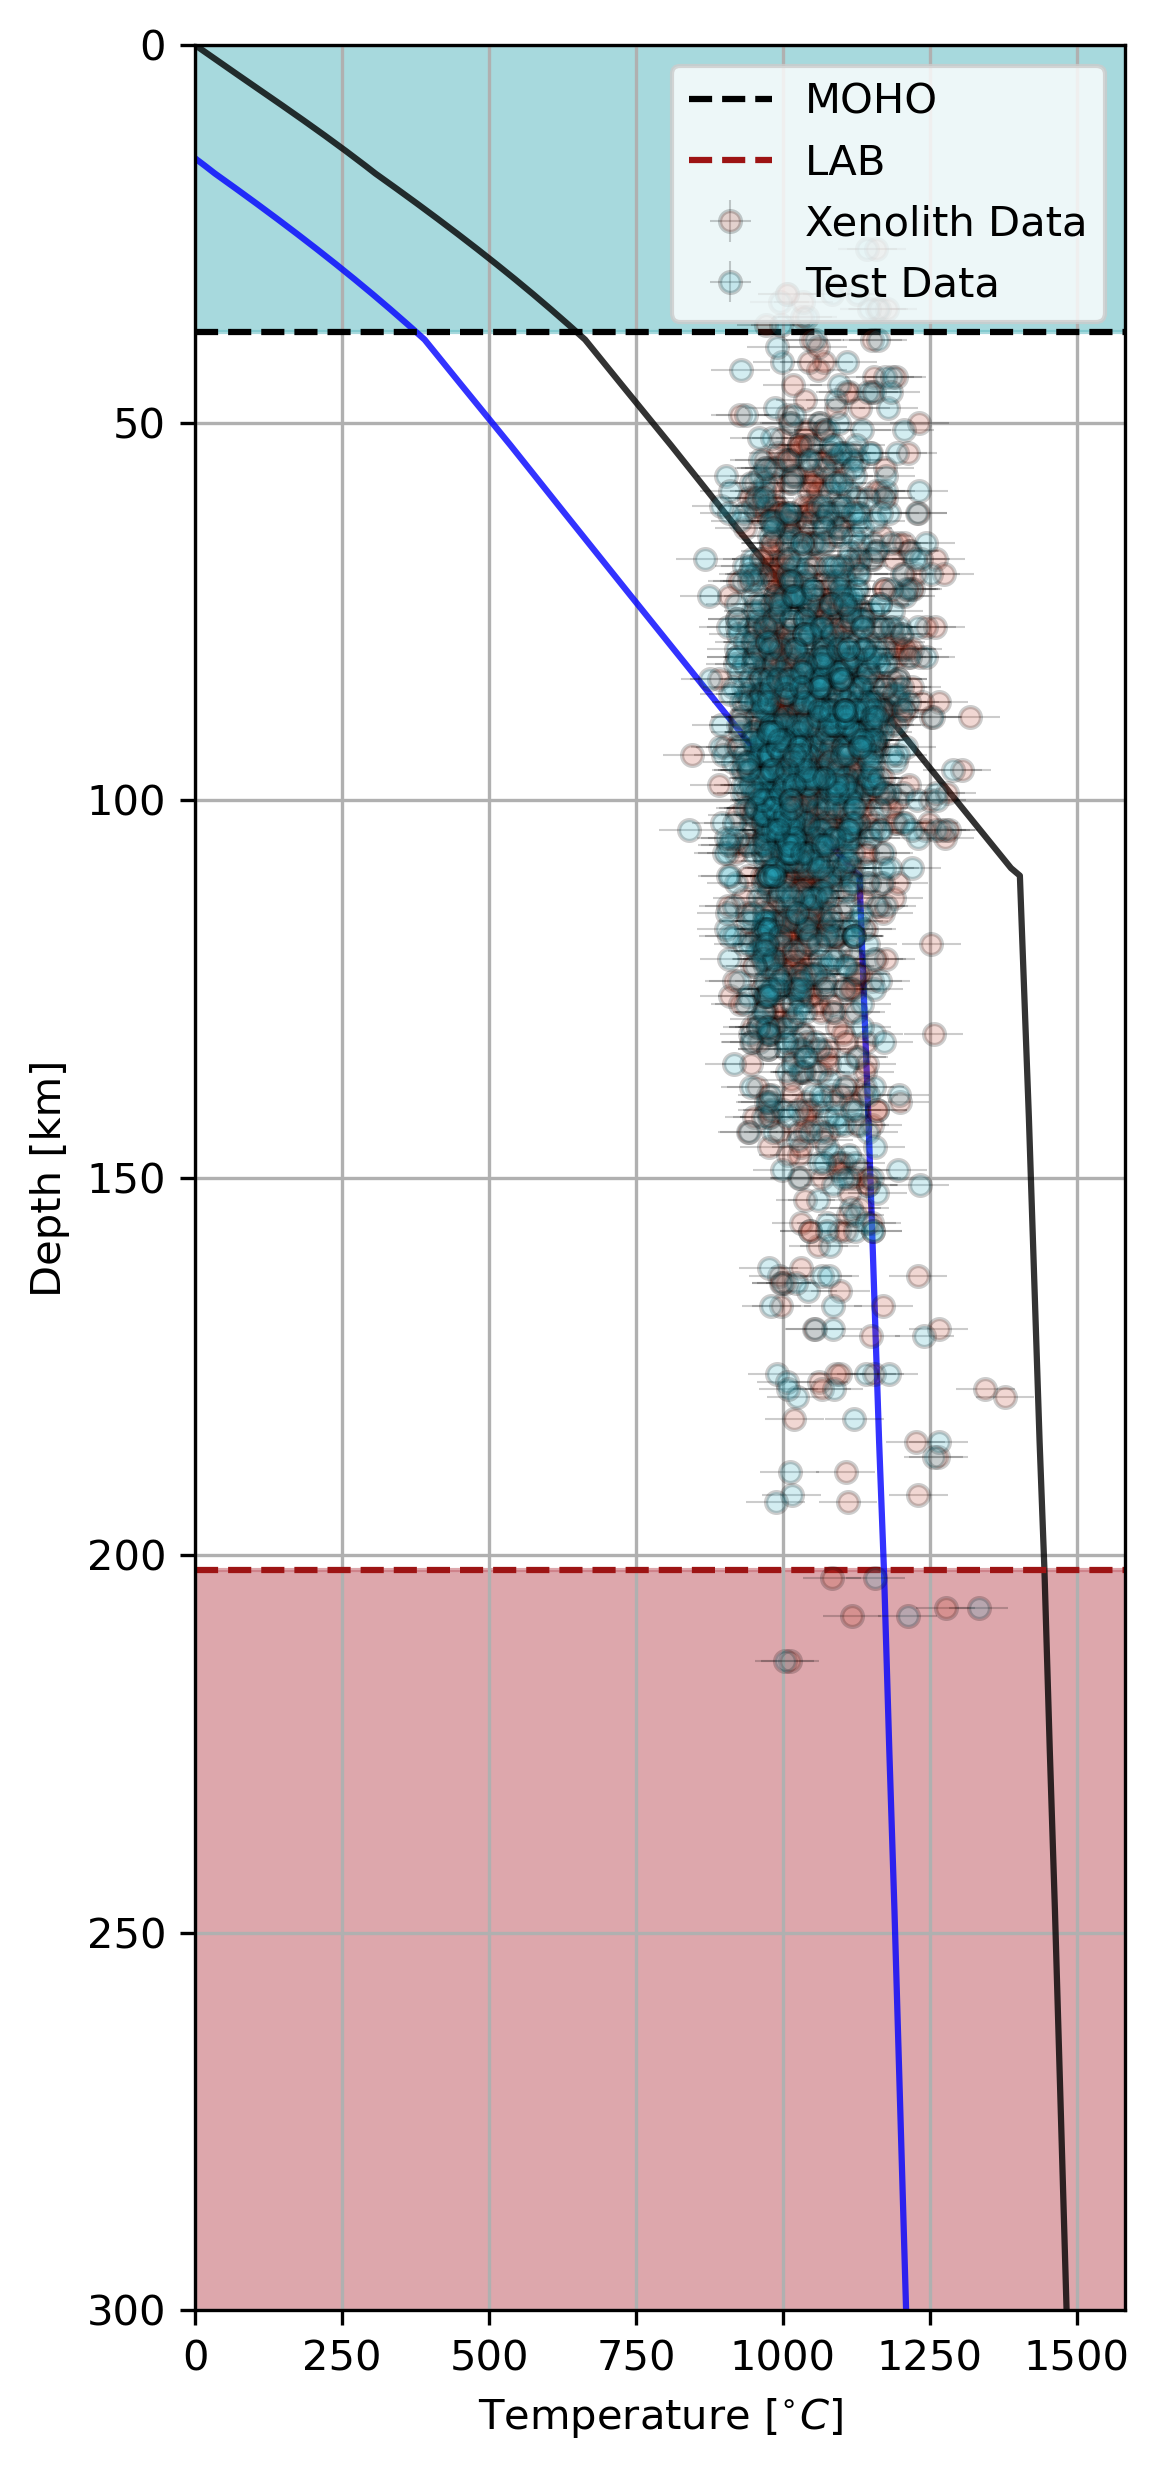

In [46]:
#Making a plot of the solution.
mantle_geotherm_plot1(T = T_solution, T1=T_solution1, P = p_solution, P1=p_solution1, Depth = depth_solution,Depth1=depth_solution1,  
                        plot_style = 'Depth', Temp_unit = 'Celsius',   #K
                        T_Sample = T_ext, P_Sample = P_ext,T_Sample1 = T_ext1, P_Sample1 = P_ext1, T_std = 50,
                        P_std = 0.3, plot_type = 'show', max_depth = 250,
                        moho = 38, lab = 202, leg = True)

In [ ]:
#Making a plot of the solution.
mantle_geotherm_plot1(T = T_solution, P = p_solution, Depth = depth_solution,T1 = T_solution1, P1 = p_solution1, Depth1 = depth_solution1,
                        plot_style = 'Depth', Temp_unit = 'Celsius',   #K
                        T_Sample = T_ext, P_Sample = P_ext,T_Sample1 = T_ext1, P_Sample1 = P_ext1, T_std = 50,
                        P_std = 0.3, plot_type = 'show', max_depth = 250,
                        moho = 38, lab = 202, leg = True)

In [ ]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt

def calculate_hasterok2011_geotherm(SHF, BDL_T, T_0, max_depth, moho, kinked, adiabat, **kwargs):

	'''

	A function to calculate the generalized steady-state geotherm for the
	continental lithosphere as taken from Hasterok & Chapman (2011).
	:cite: `hasterok2011`

	All the parameters used in constructing the geotherm are derived from the
	cited study. Generalized continental geotherm can be creating assuming
	26% of the heat generation occurs in the upper crustal layer.

	Parameters
	-------

	SHF: Surface Heat Flow value in mW/m^2

	BDL_T: is Temperature at the base of the depleted lithosphere in Celsius

	T_0: is Temperature at the surface in Celsius

	max_depth: Maximum depth the geotherm is going to be calculated for.

	moho: The depth of Mohorivicic discontinuity (i.e. crustal thickness)

	kinked: Boolean parameter to determine whether the conductive
	geotherm will be kinked parallel to D-G transition curve after the BDL.

	out_format: str
        Choose from:

        |  'Array' - A numpy array output
        |  'DataFrame' - Pandas dataframe output

	Returns
	-------
	Temperature (Kelvin), Depth (meters), Pressure (GPa), index point where the geotherm
	is kinked

	'''

	out_format = kwargs.pop('out_format', 'Array')

	if kinked == False:
		BDL_T = 0
	else:
		BDL_T = BDL_T
		d_g_t = [600,700,800,900,1000,1100,1200,1300,1400,1500,1600]
		d_g_p = [35,37.5,40,42.5,45,47.5,50,52.5,55,57.5,60]
		d_g_p = np.array(d_g_p) * 0.1
		d_g_t = np.array(d_g_t)
		d_g_slope = (np.array(d_g_t)[-1] - np.array(d_g_t)[0]) / (d_g_p[-1] - d_g_p[0])

	moho = moho * 1e3 #converting moho depth to meters
	T_0 = T_0 + 273.0 #converting celsius to kelvin
	max_depth = max_depth * 1e3 #converting max depth to meters.

	g = 9806.0
	rho_crust = 2850.0
	rho_mantle = 3340.0
	A_upper_crust = 1e-3 #mW/m^3
	A_lower_crust = 0.4e-3 #mW/m^3
	heat_prod_mantle = 4e-5 #mW/m^3

	interval = 1000.0 #Depth interval for calculations, in kms
	depth = np.arange(0,(max_depth) + interval, interval) #setting up the depth range in meters

	#Setting up the thermal conductivity parameters.
	k0_upper_1 = 1.496e3
	k0_upper_2 = 2.964e3
	k0_mid_1 = 1.733e3
	k0_mid_2 = 2.717e3
	k0_low_1 = 1.723e3
	k0_low_2 = 2.32e3
	k0_mantle_sp = 2.271e3
	k0_mantle_gt = 2.371e3
	k1_upper_1 = 398.84e3
	k1_upper_2 = -495.29e3
	k1_mid_1 = 194.59e3
	k1_mid_2 = -398.93e3
	k1_low_1 = 219.88e3
	k1_low_2 = -96.88e3
	k1_mantle_sp = 681.12e3
	k1_mantle_gt = 669.4e3
	k2_upper_1 = 4.573e-4
	k2_upper_2 = 0.866e-4
	k2_mid_1 = 2.906e-4
	k2_mid_2 = 0.032e-4
	k2_low_1 = 1.705e-4
	k2_low_2 = -0.981e-4
	k2_mantle_sp = -1.259e-4
	k2_mantle_gt = -1.288e-4
	k3_upper_1 = 0.0950
	k3_upper_2 = 0.0692
	k3_mid_1 = 0.0788
	k3_mid_2 = 0.0652
	k3_low_1 = 0.0520
	k3_low_2 = 0.0384
	k3_mantle_sp = 0.0399
	k3_mantle_gt = 0.0384

	p = np.zeros(len(depth)) #Setting up pressure array
	density_mantle = np.zeros(len(depth)) #setting up density array

	for i in range(1,len(depth)):
		if depth[i] <= moho:
			p[i] = interval * rho_crust * g
			density_mantle[i] = rho_crust
		else:
			p[i] = interval * rho_mantle * g
			density_mantle[i] = rho_mantle

	p = np.cumsum(p) / 1e12 #cumulative addition and converting to GPa

	t_criterion = 844.0 #Kelvin

	def calculate_k_st(k0,k1,k2,k3,Temp,P):

		k = (k0 + (k1 / Temp) + (k2 * Temp**2.0)) * (1 + (k3 * P))

		return k

	def interception(y1,y2):
		#Local function to calculate the interception point of arrays that have
		#used same temperature variation as paramaeter:(y1(T),y2(T))
		idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)

		return idx

	#Setting up parameters as numpy arrays at length of d_z (layers)
	T = np.zeros(len(depth)) #Temperature in Kelvin
	q = np.zeros(len(depth)) #Heat flow
	A_list = np.zeros(len(depth)) #Heat generation
	k = np.zeros(len(depth)) #Thermal conductivity
	#Setting up the first layers
	T[0] = T_0 #Temperature at surface
	q[0] = SHF #Heat flow at surface
	k[0] = (k0_upper_1 + (k1_upper_1 / T[0]) + (k2_upper_1 * T[0]**2.0)) #Thermal
	#conductivity at surface, calculated via Hasterok (2010, PhD thesis).

	#Logical parameter that will be changed when sp-garnet transition
	#going to be intercepted.
	transition_sp_search = True

	hr = 16 * 1e3
	A_upper_crust = (SHF*0.26) / 16000.0 #26% of heat generation happens in first 16 km

	#Setting up for loop that will iterate for number of layers.
	for i in range(0,len(depth)):
		#If conditionals setting the heat production parameters based on given input.

		if depth[i] <= hr:
			A_list[i] = A_upper_crust
		elif (depth[i] > hr) and (depth[i] <= moho):
			A_list[i] = A_lower_crust
		elif (depth[i] > moho) and (depth[i] <= max_depth):
			A_list[i] = heat_prod_mantle

		if i != 0:

			#Solving the temperature with formula (?)
			T[i] = T[i-1] + ((q[i-1] * interval) / k[i-1]) - ((A_list[i-1] * interval**2.0) / (2.0 * k[i-1]))
			T_avg = (T[i-1] + T[i]) / 2.0 #Averaging T

			p_spinel = 1.4209 + np.exp((3.9073 * 1e-3 * T) - 6.8041)  #Spinel-Garnet transition line calculated with T
			#Taken from Hasterok & Chapman (2011)
			p_spinel = p_spinel[np.nonzero(T)] #Getting rid of zeros


			#Calculating T-dependent thermal conductivity
			#If conditionals for different empirical parameters for critical temperature (Hasterok, 2010)

			if T[i] <= t_criterion:
				if depth[i] <= hr:
					k[i] = calculate_k_st(k0_upper_1,k1_upper_1,k2_upper_1,k3_upper_1,T_avg,p[i])
				elif (depth[i] > hr) and (depth[i] <= moho):
					k[i] = calculate_k_st(k0_low_1,k1_low_1,k2_low_1,k3_low_1,T_avg,p[i])
				else:
					#In the mantle searching for sp-gt transition
					if transition_sp_search == True:
						idx_sp = interception(p_spinel,p[:len(p_spinel)])
						if idx_sp != None:
							#If producted geotherm intercepts P-T line of sp-gt transition
							#change logical parameter to False for changing to gt.
							transition_sp_search = False
							depth_spinel = depth[i] #Depth of transition
							p_spinel_trans = p[i]
							index_spinel = i
						k[i] = calculate_k_st(k0_mantle_sp,k1_mantle_sp,k2_mantle_sp,k3_mantle_sp,T_avg,p[i])
					else:
						k[i] = calculate_k_st(k0_mantle_gt,k1_mantle_gt,k2_mantle_gt,k3_mantle_gt,T_avg,p[i])
			else:
				#Same if tree for temperatures bigger than critical temperature : (t_criterion)
				if depth[i] <= hr:
					k[i] = calculate_k_st(k0_upper_2,k1_upper_2,k2_upper_2,k3_upper_2,T_avg,p[i])
				elif (depth[i] > hr) and (depth[i] <= moho):
					k[i] = calculate_k_st(k0_low_2,k1_low_2,k2_low_2,k3_low_2,T_avg,p[i])
				else:
					if transition_sp_search == True:
						idx_sp = interception(p_spinel,p[:len(p_spinel)])
						if idx_sp != None:
							transition_sp_search = False
							depth_spinel = depth[i]
							p_spinel_trans = p[i]
						k[i] = calculate_k_st(k0_mantle_sp,k1_mantle_sp,k2_mantle_sp,k3_mantle_sp,T_avg,p[i])
					else:
						k[i] = calculate_k_st(k0_mantle_gt,k1_mantle_gt,k2_mantle_gt,k3_mantle_gt,T_avg,p[i])

			q[i] = q[i-1] - (A_list[i-1] * interval)
			if depth[i] == moho:
				crust_production = SHF - q[i]
				moho_heat_flow = q[i]

	if kinked == True:

		idx_geotherm_nearest = (np.abs(T-BDL_T)).argmin()
		t_geotherm_inflict = T[idx_geotherm_nearest]
		p_geotherm_inflict = p[idx_geotherm_nearest]
		depth_geotherm_inflict = depth[idx_geotherm_nearest]

		kinked_geotherm_add = t_geotherm_inflict - (d_g_slope * p_geotherm_inflict)
		kinked_geotherm = kinked_geotherm_add + (d_g_slope * p)

		T[idx_geotherm_nearest:] = kinked_geotherm[idx_geotherm_nearest:]

		if adiabat == True:
			adiabat = False
			print('Both "kinked" and "adiabat" cannot be True. Turning adiabat==False.')

	else:

		idx_geotherm_nearest = 0

	if adiabat == True:

		T_C_Adiabat, T_K_Adiabat = T_Katsura_2022_Adiabat(p)

		idx_T = np.argwhere(np.diff(np.sign(T - T_K_Adiabat)) != 0)

		try:
			T[idx_T[0][0]:] = T_K_Adiabat[idx_T[0][0]:]
		except IndexError:
			pass


	if out_format == 'Array':

		return T, depth, p, idx_geotherm_nearest
		
	elif out_format == 'DataFrame':

		out = pd.DataFrame(
	            data={'T_K': T, 'Depth_Km': depth, 'Pressure_GPa': p})

		return out

def T_Katsura_2022_Adiabat(P_input):

	'''
	A function that calculates the mantle adiabat temperature for given pressure
	range. Taken from Katsura (2022).

	###Parameters###
	P_input: Pressure in GPa

	'''

	Depth = [50,70,90,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,
	400,410,410,420,440,460,480,500]
	P = [1.5,2.1,2.8,3.1,3.8,4.4,5.1,5.8,6.4,7.1,7.8,8.5,9.2,9.9,10.6,11.2,
	11.9,12.6,13.4,13.7,13.7,14.1,14.9,15.6,16.4,17.1]
	T = [1646,1657,1667,1672,1682,1691,1700,1709,1718,1726,1735,1743,1751,
	1759,1766,1774,1781,1788,1796,1799,1860,1863,1871,1878,1885,1892]

	Depth = np.array(Depth)
	T_C = np.array(T) - 273.15

	# T_C_out = np.interp(P_input[P_input_idx_1:P_input_idx_2], P, T_C)
	T_C_out = np.interp(P_input ,P ,T_C)
	T_K_out = T_C_out + 273.15

	return T_C_out, T_K_out

def invert_generalised_mantle_geotherm(P_sample, T_sample, std_P, std_T, SHF_start, SHF_end, SHF_increment, max_depth, plot_solution,**kwargs):

	'''
	A function to invert a generalized geotherm to the input thermobarometric
	data.

	###Parameters###

	P_sample: Pressure of thermobarometric solution in GPa.

	T_sample: Temperature of thermobarometric solution in Kelvin.

	std_P: Standard deviation of thermobarometric solution in GPa.

	std_T: Standard deviation of thermobarometric solution in K.

	SHF_start: Starting Surface Heat Flow value to search solution (mW/m^2).

	SHF_end: The Last Surface Heat Flow value to search solution (mW/m^2).

	SHF_increment: Solution search invrement in (mW/m^2).

	max_depth: Maximum depth of the geotherm calculation in km.

	kinked: Boolean parameter to determine whether geotherm is kinked at the
		Base of the Depelted lithosphere.

	BDL_T: Temperature at the Base of the Depleted Lithosphere in K.

	adiabat: Boolean parameter to determine whether geotherm is
	calculated with an adiabat after LAB.

	plot_solution: Boolean parameter to choose whether plot a small
	graph of the solution.

	'''

	kinked = kwargs.pop('kinked', False)
	BDL_T = kwargs.pop('BDL_T', 180)
	adiabat = kwargs.pop('adiabat', False)

	#Setting up initial geotherm to calculate P equivalents.
	T, depth, P, idx_geotherm_nearest = calculate_hasterok2011_geotherm(SHF = SHF_start,
	 BDL_T = BDL_T+273, T_0 = 0, max_depth = max_depth, moho = 38,
	  kinked = kinked, adiabat = adiabat)

	depth_xen = []
	index_depth_xen = []
	t_exclude = []

	for i in range(0,len(P_sample)):
		if P_sample[i] < np.amax(P):
			idx = (np.abs(P-P_sample[i])).argmin()
			index_depth_xen.append(idx)
		else:
			t_exclude.append(i)

	t_exclude = t_exclude[::-1]
	T_xen_plot = np.asarray(T_sample)
	p_xen_plot = np.asarray(P_sample)

	for i in t_exclude:
		T_xen_plot = np.delete(T_xen_plot,i)
		p_xen_plot = np.delete(p_xen_plot,i)

	if type(std_T) is not list:
		temp_err = np.ones(len(T_sample)) * std_T
	elif type(std_T) is list:
		temp_err = np.array(std_T)

	if type(std_T) is not list:
		pres_err = np.ones(len(P_sample)) * std_P
	elif type(std_T) is list:
		pres_err = np.array(std_P)

	heat_flow_search = np.arange(SHF_start, SHF_end, SHF_increment)

	misfit_list = []

	for i in range(0,len(heat_flow_search)):

		T, depth, p, idx_geotherm_nearest = calculate_hasterok2011_geotherm(SHF = heat_flow_search[i],
		 BDL_T = BDL_T+273, T_0 = 0, max_depth = max_depth, moho = 38,
		  kinked = kinked, adiabat = adiabat)

		P_equivalent = []
		T_equivalent = []
		for i in index_depth_xen:
			P_equivalent.append(p[i])
			T_equivalent.append(T[i])

		P_equivalent = np.asarray(P_equivalent)
		T_equivalent = np.asarray(T_equivalent)

		RMS = ((1.0/float(len(T_sample))) * np.sum((((T_sample-T_equivalent)**2.0)) / (std_T**2.0))) ** 0.5
		misfit_list.append(RMS)

	index_rms_misfit = misfit_list.index(min(misfit_list))
	shf_solution = heat_flow_search[index_rms_misfit]

	T, depth, p, idx_geotherm_nearest = calculate_hasterok2011_geotherm(SHF = shf_solution,
	 BDL_T = BDL_T+273, T_0 = 0, max_depth = max_depth, moho = 38,
	  kinked = kinked, adiabat = adiabat)

	if plot_solution == True:
		plt.figure(figsize = (5,5))
		ax = plt.subplot(111)
		ax.plot(heat_flow_search, misfit_list, '-', color = 'k')
		ax.plot(shf_solution, misfit_list[index_rms_misfit], 'o', color = 'g', label = 'Best Solution')
		ax.set_xlabel('Surface Heat Flow ($mW/m^2$)')
		ax.set_ylabel('RMS misfit of T (Thermometry - Geotherm)')
		ax.grid()
		ax.legend()

		plt.show()

	return shf_solution, T, depth, p, misfit_list
